In [ ]:
pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 178MB/s]


Epoch 1/10 - Loss: 40.3789, Accuracy: 0.5325
Epoch 2/10 - Loss: 23.8068, Accuracy: 0.7576
Epoch 3/10 - Loss: 22.0766, Accuracy: 0.7429
Epoch 4/10 - Loss: 14.7440, Accuracy: 0.8398
Epoch 5/10 - Loss: 16.0732, Accuracy: 0.8476
Epoch 6/10 - Loss: 14.5418, Accuracy: 0.8675
Epoch 7/10 - Loss: 14.6545, Accuracy: 0.8372
Epoch 8/10 - Loss: 10.0380, Accuracy: 0.9134
Epoch 9/10 - Loss: 9.4412, Accuracy: 0.9004
Epoch 10/10 - Loss: 7.0325, Accuracy: 0.9515

📊 Validation Performance:
              precision    recall  f1-score   support

         pH5       0.88      0.73      0.80        92
         pH6       0.73      0.98      0.84        96
         pH7       0.85      0.77      0.81        88
         pH8       0.84      0.76      0.79        94

    accuracy                           0.81       370
   macro avg       0.82      0.81      0.81       370
weighted avg       0.82      0.81      0.81       370



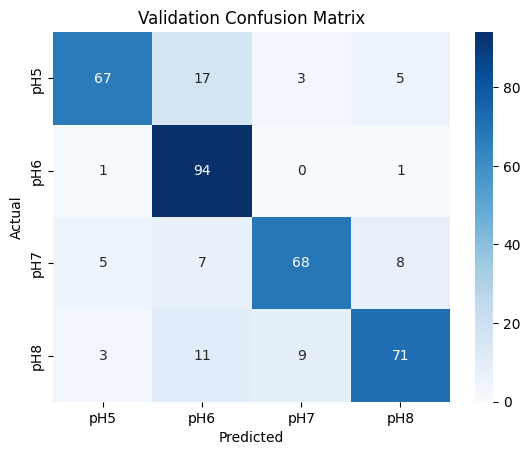


📊 Test Performance:
              precision    recall  f1-score   support

         pH5       0.79      0.75      0.77       111
         pH6       0.70      0.95      0.81       111
         pH7       0.90      0.74      0.81       106
         pH8       0.95      0.82      0.88       110

    accuracy                           0.82       438
   macro avg       0.83      0.81      0.82       438
weighted avg       0.83      0.82      0.82       438



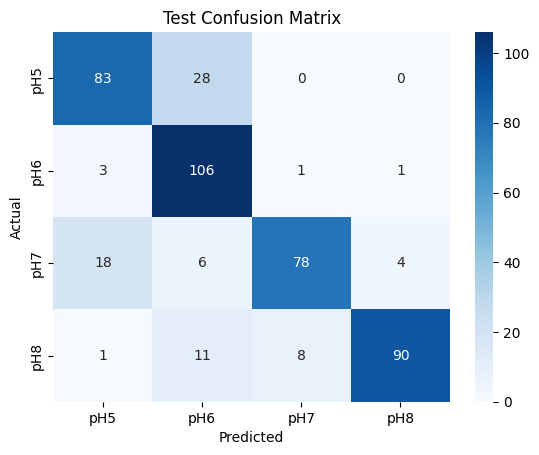

In [3]:
import os
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration
data_dir = "drive/MyDrive/Split_Data/"  # Your dataset path
batch_size = 32
num_epochs = 10
num_classes = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Helper to load all time points together
def load_combined_dataset(split):
    datasets_list = []
    split_path = os.path.join(data_dir, split)
    for time_point in os.listdir(split_path):
        time_path = os.path.join(split_path, time_point)
        if os.path.isdir(time_path):
            ds = datasets.ImageFolder(time_path, transform=transform)
            datasets_list.append(ds)
    return torch.utils.data.ConcatDataset(datasets_list)

# Load datasets
train_dataset = load_combined_dataset("train")
val_dataset = load_combined_dataset("val")
test_dataset = load_combined_dataset("test")

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Model setup
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss, correct = 0.0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

    acc = correct / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {total_loss:.4f}, Accuracy: {acc:.4f}")

# Evaluation function
def evaluate(loader, split_name):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            preds = outputs.argmax(1).cpu()
            all_preds.extend(preds)
            all_labels.extend(labels)

    print(f"\n📊 {split_name} Performance:")
    print(classification_report(all_labels, all_preds, target_names=["pH5", "pH6", "pH7", "pH8"]))

    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=["pH5", "pH6", "pH7", "pH8"],
                yticklabels=["pH5", "pH6", "pH7", "pH8"], cmap="Blues")
    plt.title(f"{split_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Final evaluation
evaluate(val_loader, "Validation")
evaluate(test_loader, "Test")

In [6]:
# Save model
torch.save(model.state_dict(), 'resnet18_ph_classifier.pth')